# Principle Component Analysis

The a technique used to help reduce the dimensionality in machine learning. The lower the dimensionality, the less computational time for a given ML algorithm.

In the is notebook, I will perform the following on the IRIS dataset

* Standardize the data
* Identify the Principle Components
* And Visualize the Components

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing, datasets, decomposition

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Normalize the data

This is important because we want all variables to have a common scale without distorting the ranges. Every dataset does not 
require normalization in a ML algorithm but I want to see the same standard deviation and weight for each measurement to their 
relevant axis

In [3]:
features = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']
x = data1.loc[:, features].values
y = data1.loc[:, ['target']].values

In [4]:
features = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']
x = data1.loc[:, features].values
y = data1.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

data = pd.DataFrame(data = x, columns = features)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA projection into 2D

In [5]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
prinDF = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 
                                                                  'Principal Component 2'])
prinDF.head()

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [6]:
finalDF = pd.concat([prinDF, data1[['target']]], axis = 1)
finalDF.head()

,Principal Component 1,Principal Component 2,target
0,-2.264542,0.505704,0.0
1,-2.086426,-0.655405,0.0
2,-2.367950,-0.318477,0.0
3,-2.304197,-0.575368,0.0
4,-2.388777,0.674767,0.0


## Visualize the data

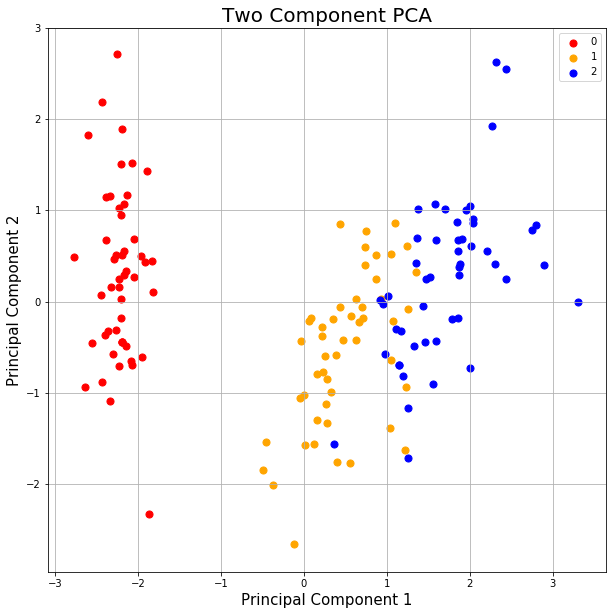

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA', fontsize = 20)

targets = [0,1,2]
colors = ['red','orange','blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'Principal Component 1'],
              finalDF.loc[indicesToKeep,'Principal Component 2'],
              c = color,
              s = 50)

ax.legend(targets)
ax.grid()

## Explained Variance
The explained variance tells us how much information variance can be attributed to each principal component.

In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [9]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9580097536148198

sklearn also offers a feature where you can let the decomposition import find the required number of components by change

pca = PCA(n_components=2)    to    pca = PCA(0.95)


## Data Visualization

Lets display these components and highlight some features with K Means clustering

In [10]:
from sklearn.cluster import KMeans
K_Means = KMeans(n_clusters=2)
k_means_ID = K_Means.fit_predict(finalDF[['Principal Component 1','Principal Component 2']])
k_means_ID

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
K_Means.cluster_centers_

array([[ 1.11009664, -0.14611241],
       [-2.22019328,  0.29222482]])

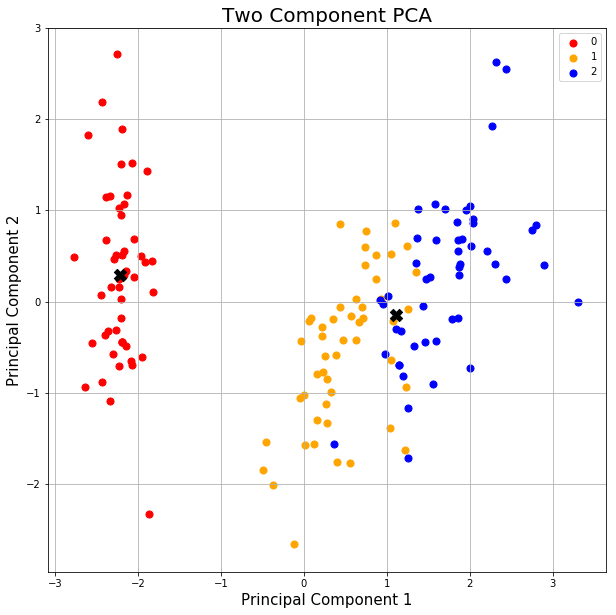

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA', fontsize = 20)

targets = [0,1,2]
colors = ['red','orange','blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'Principal Component 1'],
              finalDF.loc[indicesToKeep,'Principal Component 2'],
              c = color,
              s = 50)

ax.scatter(K_Means.cluster_centers_[:,0],
           K_Means.cluster_centers_[:,1],
           color = 'black',
           marker = 'X',
           s = 150,
           label = "centroid")    
    
ax.legend(targets)
ax.grid()

So, the two components contain more than 95% of the information and we want to be above 90%. The 3rd and 4th principal component contain the rest of the variance of the dataset

## Three Principal Components ??

Lets see when we add another component

In [13]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
prinDF = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 
                                                             'Principal Component 2',
                                                             'Principal Component 3'])
prinDF.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428


In [14]:
finalDF = pd.concat([prinDF, data1[['target']]], axis = 1)
finalDF.head()

,Principal Component 1,Principal Component 2,Principal Component 3,target
0,-2.264542,0.505704,-0.121943,0.0
1,-2.086426,-0.655405,-0.227251,0.0
2,-2.367950,-0.318477,0.051480,0.0
3,-2.304197,-0.575368,0.098860,0.0
4,-2.388777,0.674767,0.021428,0.0


## Need to use a 3D plot now

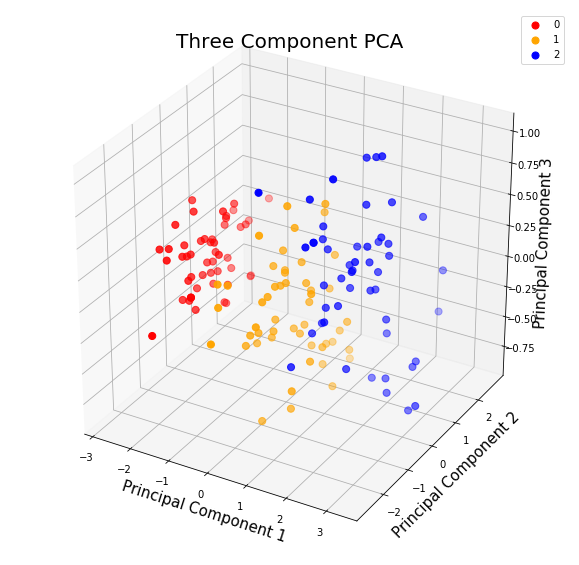

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

targets = [0,1,2]
colors = ['r','orange','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'Principal Component 1'],
              finalDF.loc[indicesToKeep,'Principal Component 2'],
               finalDF.loc[indicesToKeep, 'Principal Component 3'],
              c = color,
              s = 50)

    
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three Component PCA', fontsize = 20)

ax.legend(targets)
ax.grid()

In [16]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

In [17]:
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]+pca.explained_variance_ratio_[2]

0.9948480731910937

A 3rd component does make up for 99% of the information so i guess it's good if the significance of the testing required a
greater coverage. 

## Centroids of each cluster

In [18]:
from sklearn.cluster import KMeans
K_Means = KMeans(n_clusters=3)
k_means_ID = K_Means.fit_predict(finalDF[['Principal Component 1','Principal Component 2','Principal Component 3']])
k_means_ID

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [19]:
K_Means.cluster_centers_

array([[-2.22019328,  0.29222482, -0.04395511],
       [ 1.72236912,  0.59990509, -0.01062183],
       [ 0.56713803, -0.8076751 ,  0.05088645]])

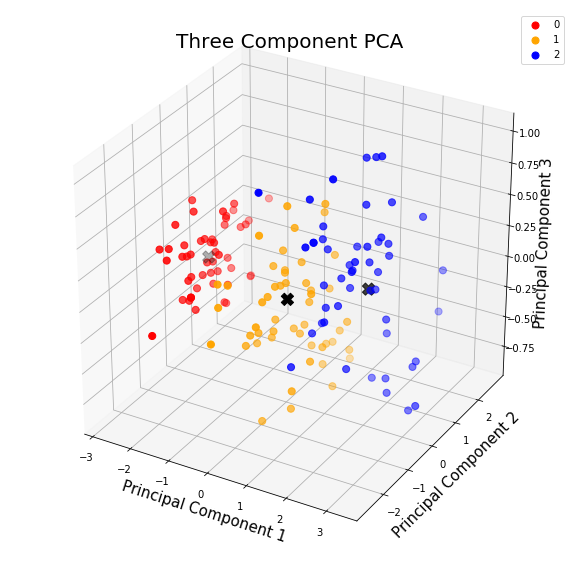

In [20]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

targets = [0,1,2]
colors = ['r','orange','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['target'] == target
    ax.scatter(finalDF.loc[indicesToKeep,'Principal Component 1'],
              finalDF.loc[indicesToKeep,'Principal Component 2'],
               finalDF.loc[indicesToKeep, 'Principal Component 3'],
              c = color,
              s = 50)
    
ax.scatter(K_Means.cluster_centers_[:,0],
           K_Means.cluster_centers_[:,1],
           K_Means.cluster_centers_[:,2],
           color = 'black',
           marker = 'X',
           s = 150,
           label = "centroid")

    
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three Component PCA', fontsize = 20)

ax.legend(targets)
ax.grid()